In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['DATE', 'HARE', 'LYNX'])
print(df)

    DATE   HARE   LYNX
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


In [51]:
for col in ['HARE', 'LYNX']:
    df[f'{col}_lag1'] = df[col].shift(1)

df['Lynx_on_Hare'] = df['LYNX_lag1'] * df['HARE']
df.dropna(inplace=True)
print(df)

    DATE   HARE   LYNX  HARE_lag1  LYNX_lag1  Lynx_on_Hare
1   1846  19.60  45.15      19.58      30.09      589.7640
2   1847  19.61  49.15      19.60      45.15      885.3915
3   1848  11.99  39.52      19.61      49.15      589.3085
4   1849  28.04  21.23      11.99      39.52     1108.1408
5   1850  58.00   8.42      28.04      21.23     1231.3400
..   ...    ...    ...        ...        ...           ...
86  1931  19.52   8.31       4.23       6.98      136.2496
87  1932  82.11  16.01      19.52       8.31      682.3341
88  1933  89.76  24.82      82.11      16.01     1437.0576
89  1934  81.66  29.70      89.76      24.82     2026.8012
90  1935  15.76  35.40      81.66      29.70      468.0720

[90 rows x 6 columns]


In [52]:
X = df.drop(['DATE', 'HARE', 'LYNX'], axis=1)
y = df[['HARE', 'LYNX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

    HARE_lag1  LYNX_lag1  Lynx_on_Hare
50      70.40      46.00     3947.2600
63      23.37       6.30      135.7020
74       4.50       6.82       76.4522
70      40.97      43.36     1081.8320
77      69.63       9.94      772.7356
..        ...        ...           ...
21      85.81      60.78     2516.8998
61      57.78      63.51     1821.4668
72      12.59      30.36      150.8892
15      12.64      13.69      294.1981
52      56.69      46.43      770.2737

[72 rows x 3 columns]
     HARE   LYNX
1   19.60  45.15
2   19.61  49.15
3   11.99  39.52
4   28.04  21.23
5   58.00   8.42
..    ...    ...
86  19.52   8.31
87  82.11  16.01
88  89.76  24.82
89  81.66  29.70
90  15.76  35.40

[90 rows x 2 columns]


In [53]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.0563, Test MSE: 1.8849
Epoch 2/200, Training MSE: 1.0051, Test MSE: 1.7872
Epoch 3/200, Training MSE: 0.9562, Test MSE: 1.6942
Epoch 4/200, Training MSE: 0.9088, Test MSE: 1.6042
Epoch 5/200, Training MSE: 0.8632, Test MSE: 1.5164
Epoch 6/200, Training MSE: 0.8202, Test MSE: 1.4313
Epoch 7/200, Training MSE: 0.7792, Test MSE: 1.3496
Epoch 8/200, Training MSE: 0.7399, Test MSE: 1.2719
Epoch 9/200, Training MSE: 0.7023, Test MSE: 1.1961
Epoch 10/200, Training MSE: 0.6660, Test MSE: 1.1234
Epoch 11/200, Training MSE: 0.6320, Test MSE: 1.0532
Epoch 12/200, Training MSE: 0.6000, Test MSE: 0.9900
Epoch 13/200, Training MSE: 0.5701, Test MSE: 0.9302
Epoch 14/200, Training MSE: 0.5421, Test MSE: 0.8743


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 15/200, Training MSE: 0.5158, Test MSE: 0.8201
Epoch 16/200, Training MSE: 0.4909, Test MSE: 0.7682
Epoch 17/200, Training MSE: 0.4679, Test MSE: 0.7192
Epoch 18/200, Training MSE: 0.4463, Test MSE: 0.6743
Epoch 19/200, Training MSE: 0.4265, Test MSE: 0.6327
Epoch 20/200, Training MSE: 0.4086, Test MSE: 0.5939
Epoch 21/200, Training MSE: 0.3924, Test MSE: 0.5578
Epoch 22/200, Training MSE: 0.3777, Test MSE: 0.5256
Epoch 23/200, Training MSE: 0.3641, Test MSE: 0.4950
Epoch 24/200, Training MSE: 0.3520, Test MSE: 0.4688
Epoch 25/200, Training MSE: 0.3411, Test MSE: 0.4459
Epoch 26/200, Training MSE: 0.3310, Test MSE: 0.4292
Epoch 27/200, Training MSE: 0.3217, Test MSE: 0.4180
Epoch 28/200, Training MSE: 0.3131, Test MSE: 0.4065
Epoch 29/200, Training MSE: 0.3051, Test MSE: 0.3971
Epoch 30/200, Training MSE: 0.2975, Test MSE: 0.3897
Epoch 31/200, Training MSE: 0.2904, Test MSE: 0.3836
Epoch 32/200, Training MSE: 0.2837, Test MSE: 0.3771
Epoch 33/200, Training MSE: 0.2774, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 121/200, Training MSE: 0.1313, Test MSE: 0.3419
Epoch 122/200, Training MSE: 0.1320, Test MSE: 0.3262
Epoch 123/200, Training MSE: 0.1304, Test MSE: 0.3474
Epoch 124/200, Training MSE: 0.1311, Test MSE: 0.3254
Epoch 125/200, Training MSE: 0.1294, Test MSE: 0.3471
Epoch 126/200, Training MSE: 0.1301, Test MSE: 0.3296
Epoch 127/200, Training MSE: 0.1285, Test MSE: 0.3497
Epoch 128/200, Training MSE: 0.1291, Test MSE: 0.3296
Epoch 129/200, Training MSE: 0.1276, Test MSE: 0.3515
Epoch 130/200, Training MSE: 0.1283, Test MSE: 0.3305
Epoch 131/200, Training MSE: 0.1268, Test MSE: 0.3515
Epoch 132/200, Training MSE: 0.1275, Test MSE: 0.3334
Epoch 133/200, Training MSE: 0.1259, Test MSE: 0.3546
Epoch 134/200, Training MSE: 0.1266, Test MSE: 0.3348
Epoch 135/200, Training MSE: 0.1251, Test MSE: 0.3574
Epoch 136/200, Training MSE: 0.1258, Test MSE: 0.3354
Epoch 137/200, Training MSE: 0.1243, Test MSE: 0.3587
Epoch 138/200, Training MSE: 0.1250, Test MSE: 0.3373
Epoch 139/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

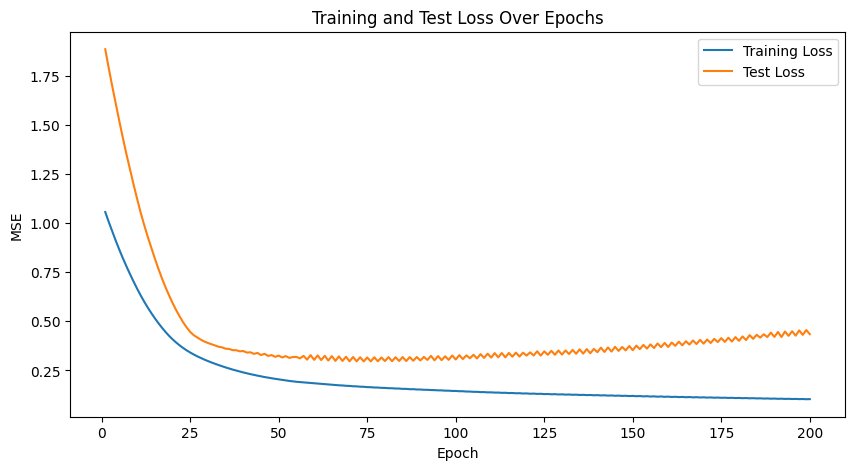

Final Test MSE: 0.43463778475187137


In [54]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [55]:
df = pd.read_csv('../../Datasets/study_373/top_5_373.csv', usecols=['DATE', '46670', '46982', '46504', '46571', '46888'])
print(df)

           DATE  46670  46982  46504  46571  46888
0    2008-06-08    1.0    2.0    1.0    1.0    2.0
1    2008-07-11    1.0    3.0    1.0    1.0    2.0
2    2008-09-14    2.0    6.0    2.0    1.0    1.0
3    2008-09-16    2.0    1.0    1.0    1.0    3.0
4    2008-09-22    2.0    4.0    1.0    1.0    2.0
..          ...    ...    ...    ...    ...    ...
388  2012-10-18   10.0    6.0    1.0    1.0    2.0
389  2012-10-22    8.0    6.0    1.0    1.0    3.0
390  2012-10-28    3.0    1.0    1.0    1.0    2.0
391  2012-11-08    2.0    7.0    1.0    1.0    2.0
392  2012-11-09    2.0    1.0    1.0    1.0    1.0

[393 rows x 6 columns]


In [56]:
for col in ['46670', '46982', '46504', '46571', '46888']:
    df[f'{col}_lag1'] = df[col].shift(1)

# 46670  Nyctereutes procyonoides	common raccoon dog  -> Rodents, Japanese Hare
# 46982  Sus scrofa				    wild boar           -> Rodents, Japanese Hare
# 46504  Lepus brachyurus			Japanese Hare
# 46571  Meles anakuma			    Japanese Badger     -> Rodents
# 46888  Rodentia	

# 46670 Nyctereutes procyonoides	common raccoon dog  -> Rodents, Japanese Hare
df['46670_on_46888'] = df['46670_lag1'] * df['46888']
df['46670_on_46504'] = df['46670_lag1'] * df['46504']

# 46982 Sus scrofa				    wild boar           -> Rodents, Japanese Hare
df['46982_on_46888'] = df['46982_lag1'] * df['46888']
df['46982_on_46504'] = df['46982_lag1'] * df['46504']

# 46571 Meles anakuma			    Japanese Badger     -> Rodents
df['46571_on_46888'] = df['46571_lag1'] * df['46888']

df.dropna(inplace=True)
print(df)

           DATE  46670  46982  46504  46571  46888  46670_lag1  46982_lag1  \
1    2008-07-11    1.0    3.0    1.0    1.0    2.0         1.0         2.0   
2    2008-09-14    2.0    6.0    2.0    1.0    1.0         1.0         3.0   
3    2008-09-16    2.0    1.0    1.0    1.0    3.0         2.0         6.0   
4    2008-09-22    2.0    4.0    1.0    1.0    2.0         2.0         1.0   
5    2008-09-25    2.0    4.0    1.0    1.0    3.0         2.0         4.0   
..          ...    ...    ...    ...    ...    ...         ...         ...   
388  2012-10-18   10.0    6.0    1.0    1.0    2.0        12.0         9.0   
389  2012-10-22    8.0    6.0    1.0    1.0    3.0        10.0         6.0   
390  2012-10-28    3.0    1.0    1.0    1.0    2.0         8.0         6.0   
391  2012-11-08    2.0    7.0    1.0    1.0    2.0         3.0         1.0   
392  2012-11-09    2.0    1.0    1.0    1.0    1.0         2.0         7.0   

     46504_lag1  46571_lag1  46888_lag1  46670_on_46888  46670_

In [57]:
X = df.drop(['DATE', '46670', '46982', '46504', '46571', '46888'], axis=1)
y = df[['46670', '46982', '46504', '46571', '46888']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

     46670_lag1  46982_lag1  46504_lag1  46571_lag1  46888_lag1  \
259         9.0         2.0         7.0         2.0         1.0   
183         1.0         3.0         6.0        10.0         3.0   
173         2.0         2.0         4.0         2.0         1.0   
64          4.0         1.0        10.0         5.0         1.0   
341         6.0         3.0         2.0         5.0         1.0   
..          ...         ...         ...         ...         ...   
72          1.0         7.0         9.0         1.0         1.0   
107        11.0        10.0         2.0         4.0         7.0   
271         9.0         9.0         4.0         3.0         2.0   
349        12.0         7.0         1.0         2.0         4.0   
103        10.0        13.0         5.0         2.0         1.0   

     46670_on_46888  46670_on_46504  46982_on_46888  46982_on_46504  \
259             9.0             9.0             2.0             2.0   
183             7.0             3.0            21.0  

In [58]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.1614, Test MSE: 1.4624
Epoch 2/200, Training MSE: 1.0828, Test MSE: 1.3652
Epoch 3/200, Training MSE: 1.0157, Test MSE: 1.2828
Epoch 4/200, Training MSE: 0.9578, Test MSE: 1.2096
Epoch 5/200, Training MSE: 0.9077, Test MSE: 1.1453
Epoch 6/200, Training MSE: 0.8631, Test MSE: 1.0890
Epoch 7/200, Training MSE: 0.8228, Test MSE: 1.0388
Epoch 8/200, Training MSE: 0.7865, Test MSE: 0.9927
Epoch 9/200, Training MSE: 0.7535, Test MSE: 0.9500
Epoch 10/200, Training MSE: 0.7233, Test MSE: 0.9107
Epoch 11/200, Training MSE: 0.6954, Test MSE: 0.8748
Epoch 12/200, Training MSE: 0.6695, Test MSE: 0.8420
Epoch 13/200, Training MSE: 0.6455, Test MSE: 0.8111
Epoch 14/200, Training MSE: 0.6234, Test MSE: 0.7824
Epoch 15/200, Training MSE: 0.6035, Test MSE: 0.7572
Epoch 16/200, Training MSE: 0.5853, Test MSE: 0.7345
Epoch 17/200, Training MSE: 0.5696, Test MSE: 0.7157
Epoch 18/200, Training MSE: 0.5551, Test MSE: 0.6986
Epoch 19/200, Training MSE: 0.5426, Test MSE: 0.6847
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 45/200, Training MSE: 0.4239, Test MSE: 0.6248
Epoch 46/200, Training MSE: 0.4205, Test MSE: 0.6165
Epoch 47/200, Training MSE: 0.4196, Test MSE: 0.6236
Epoch 48/200, Training MSE: 0.4164, Test MSE: 0.6161
Epoch 49/200, Training MSE: 0.4157, Test MSE: 0.6239
Epoch 50/200, Training MSE: 0.4125, Test MSE: 0.6160
Epoch 51/200, Training MSE: 0.4119, Test MSE: 0.6239
Epoch 52/200, Training MSE: 0.4087, Test MSE: 0.6170
Epoch 53/200, Training MSE: 0.4080, Test MSE: 0.6245
Epoch 54/200, Training MSE: 0.4051, Test MSE: 0.6179
Epoch 55/200, Training MSE: 0.4046, Test MSE: 0.6242
Epoch 56/200, Training MSE: 0.4018, Test MSE: 0.6166
Epoch 57/200, Training MSE: 0.4013, Test MSE: 0.6251
Epoch 58/200, Training MSE: 0.3985, Test MSE: 0.6176
Epoch 59/200, Training MSE: 0.3981, Test MSE: 0.6246
Epoch 60/200, Training MSE: 0.3953, Test MSE: 0.6177
Epoch 61/200, Training MSE: 0.3948, Test MSE: 0.6254
Epoch 62/200, Training MSE: 0.3922, Test MSE: 0.6185
Epoch 63/200, Training MSE: 0.3918, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 117/200, Training MSE: 0.3280, Test MSE: 0.6530
Epoch 118/200, Training MSE: 0.3252, Test MSE: 0.6509
Epoch 119/200, Training MSE: 0.3259, Test MSE: 0.6543
Epoch 120/200, Training MSE: 0.3235, Test MSE: 0.6526
Epoch 121/200, Training MSE: 0.3243, Test MSE: 0.6556
Epoch 122/200, Training MSE: 0.3215, Test MSE: 0.6521
Epoch 123/200, Training MSE: 0.3222, Test MSE: 0.6557
Epoch 124/200, Training MSE: 0.3196, Test MSE: 0.6558
Epoch 125/200, Training MSE: 0.3206, Test MSE: 0.6569
Epoch 126/200, Training MSE: 0.3178, Test MSE: 0.6541
Epoch 127/200, Training MSE: 0.3183, Test MSE: 0.6571
Epoch 128/200, Training MSE: 0.3159, Test MSE: 0.6559
Epoch 129/200, Training MSE: 0.3165, Test MSE: 0.6576
Epoch 130/200, Training MSE: 0.3140, Test MSE: 0.6553
Epoch 131/200, Training MSE: 0.3148, Test MSE: 0.6595
Epoch 132/200, Training MSE: 0.3121, Test MSE: 0.6577
Epoch 133/200, Training MSE: 0.3129, Test MSE: 0.6582
Epoch 134/200, Training MSE: 0.3101, Test MSE: 0.6566
Epoch 135/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 172/200, Training MSE: 0.2784, Test MSE: 0.6759
Epoch 173/200, Training MSE: 0.2810, Test MSE: 0.6792
Epoch 174/200, Training MSE: 0.2767, Test MSE: 0.6777
Epoch 175/200, Training MSE: 0.2797, Test MSE: 0.6794
Epoch 176/200, Training MSE: 0.2753, Test MSE: 0.6779
Epoch 177/200, Training MSE: 0.2783, Test MSE: 0.6806
Epoch 178/200, Training MSE: 0.2741, Test MSE: 0.6789
Epoch 179/200, Training MSE: 0.2770, Test MSE: 0.6794
Epoch 180/200, Training MSE: 0.2729, Test MSE: 0.6782
Epoch 181/200, Training MSE: 0.2755, Test MSE: 0.6813
Epoch 182/200, Training MSE: 0.2713, Test MSE: 0.6779
Epoch 183/200, Training MSE: 0.2741, Test MSE: 0.6833
Epoch 184/200, Training MSE: 0.2702, Test MSE: 0.6798
Epoch 185/200, Training MSE: 0.2729, Test MSE: 0.6829
Epoch 186/200, Training MSE: 0.2687, Test MSE: 0.6814
Epoch 187/200, Training MSE: 0.2717, Test MSE: 0.6849
Epoch 188/200, Training MSE: 0.2674, Test MSE: 0.6819
Epoch 189/200, Training MSE: 0.2704, Test MSE: 0.6842
Epoch 190/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

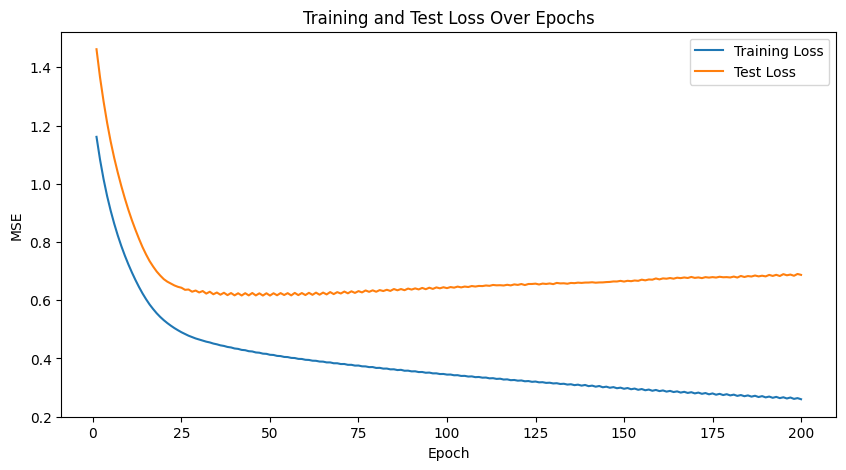

Final Test MSE: 0.6870721639851525


In [59]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [60]:
df = pd.read_csv('../../Datasets/study_213/top_5_213.csv', usecols=['DATE', '7058', '8572', '39601', '8901', '7730'])
print(df)

            DATE    7058   8572  39601   8901   7730
0     1963-11-14  1531.0  422.0   19.0  164.0    2.0
1     1963-12-10   437.0   94.0   17.0   97.0    1.0
2     1964-10-25   189.0   66.0   36.0   23.0  761.0
3     1964-10-29   370.0  116.0   83.0  196.0  561.0
4     1964-12-04   101.0    5.0   21.0  233.0    2.0
...          ...     ...    ...    ...    ...    ...
1510  2008-10-28   255.0   16.0  185.0   44.0   15.0
1511  2008-10-30   741.0  735.0  252.0   87.0  382.0
1512  2008-11-03   287.0  291.0   14.0   16.0    1.0
1513  2008-11-04   732.0  468.0   32.0  186.0    1.0
1514  2008-11-08    78.0    3.0  471.0    1.0   14.0

[1515 rows x 6 columns]


In [61]:
for col in ['7058', '8572', '39601', '8901', '7730']:
    df[f'{col}_lag1'] = df[col].shift(1)

"""
7058 ['Merluccius bilinearis']  Silver hake             -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
8572 ['Squalus acanthias']      Spiny dogfish           -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
39601 ['Doryteuthis pealeii']   Longfin inshore squid   -> Silver hake, Longfin inshore squid
8901 ['Urophycis chuss']        Red hake                -> Silver hake, Longfin inshore squid, Red hake, American butterfish
7730 ['Peprilus triacanthus']   American butterfish     -> Longfin inshore squid
"""

# 7058 ['Merluccius bilinearis']  Silver hake -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
df['7058_on_7058'] = df['7058_lag1'] * df['7058']
df['7058_on_8572'] = df['7058_lag1'] * df['8572']
df['7058_on_39601'] = df['7058_lag1'] * df['39601']
df['7058_on_8901'] = df['7058_lag1'] * df['8901']
df['7058_on_7730'] = df['7058_lag1'] * df['7730']

# 8572 ['Squalus acanthias']  Spiny dogfish -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
df['8572_on_7058'] = df['8572_lag1'] * df['7058']
df['8572_on_8572'] = df['8572_lag1'] * df['8572']
df['8572_on_39601'] = df['8572_lag1'] * df['39601']
df['8572_on_8901'] = df['8572_lag1'] * df['8901']
df['8572_on_7730'] = df['8572_lag1'] * df['7730']

# 39601 ['Doryteuthis pealeii']  Longfin inshore squid -> Silver hake, Longfin inshore squid
df['39601_on_7058'] = df['39601_lag1'] * df['7058']
df['39601_on_39601'] = df['39601_lag1'] * df['39601']

# 8901 ['Urophycis chuss']  Red hake -> Silver hake, Longfin inshore squid, Red hake, American butterfish
df['8901_on_7058'] = df['8901_lag1'] * df['7058']
df['8901_on_39601'] = df['8901_lag1'] * df['39601']
df['8901_on_8901'] = df['8901_lag1'] * df['8901']
df['8901_on_7730'] = df['8901_lag1'] * df['7730']

# 7730 ['Peprilus triacanthus']  American butterfish -> Longfin inshore squid
df['7730_on_39601'] = df['7730_lag1'] * df['39601']


df.dropna(inplace=True)
print(df)

            DATE   7058   8572  39601   8901   7730  7058_lag1  8572_lag1  \
1     1963-12-10  437.0   94.0   17.0   97.0    1.0     1531.0      422.0   
2     1964-10-25  189.0   66.0   36.0   23.0  761.0      437.0       94.0   
3     1964-10-29  370.0  116.0   83.0  196.0  561.0      189.0       66.0   
4     1964-12-04  101.0    5.0   21.0  233.0    2.0      370.0      116.0   
5     1965-10-31  131.0   22.0  798.0   58.0    1.0      101.0        5.0   
...          ...    ...    ...    ...    ...    ...        ...        ...   
1510  2008-10-28  255.0   16.0  185.0   44.0   15.0      249.0      469.0   
1511  2008-10-30  741.0  735.0  252.0   87.0  382.0      255.0       16.0   
1512  2008-11-03  287.0  291.0   14.0   16.0    1.0      741.0      735.0   
1513  2008-11-04  732.0  468.0   32.0  186.0    1.0      287.0      291.0   
1514  2008-11-08   78.0    3.0  471.0    1.0   14.0      732.0      468.0   

      39601_lag1  8901_lag1  ...  8572_on_39601  8572_on_8901  8572_on_7730

In [62]:
X = df.drop(['DATE', '7058', '8572', '39601', '8901', '7730'], axis=1)
y = df[['7058', '8572', '39601', '8901', '7730']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

      7058_lag1  8572_lag1  39601_lag1  8901_lag1  7730_lag1  7058_on_7058  \
870       644.0      680.0      7728.0      199.0      466.0      217028.0   
1280        4.0      555.0       299.0        1.0       93.0          56.0   
1334      430.0      446.0       976.0      227.0      106.0       13330.0   
602       277.0      127.0      3183.0       17.0     4934.0       42935.0   
591       268.0      377.0      1110.0       12.0       23.0       84956.0   
...         ...        ...         ...        ...        ...           ...   
1131       24.0      495.0      5247.0       10.0      529.0          96.0   
1295       13.0        2.0       234.0      131.0      304.0          39.0   
861       487.0      438.0         1.0       33.0        1.0       11201.0   
1460        6.0        7.0       353.0        7.0       42.0         174.0   
1127     1776.0      462.0         1.0       85.0        4.0       55056.0   

      7058_on_8572  7058_on_39601  7058_on_8901  7058_on_7730  

In [63]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.0082, Test MSE: 1.0474
Epoch 2/200, Training MSE: 0.8369, Test MSE: 0.8532
Epoch 3/200, Training MSE: 0.7238, Test MSE: 0.7946
Epoch 4/200, Training MSE: 0.6388, Test MSE: 0.7888
Epoch 5/200, Training MSE: 0.5722, Test MSE: 0.8162
Epoch 6/200, Training MSE: 0.5213, Test MSE: 0.8386
Epoch 7/200, Training MSE: 0.4819, Test MSE: 0.8716
Epoch 8/200, Training MSE: 0.4477, Test MSE: 0.8974
Epoch 9/200, Training MSE: 0.4194, Test MSE: 0.9359
Epoch 10/200, Training MSE: 0.3940, Test MSE: 0.9663
Epoch 11/200, Training MSE: 0.3721, Test MSE: 0.9853
Epoch 12/200, Training MSE: 0.3520, Test MSE: 0.9929
Epoch 13/200, Training MSE: 0.3340, Test MSE: 0.9981
Epoch 14/200, Training MSE: 0.3181, Test MSE: 0.9871
Epoch 15/200, Training MSE: 0.3034, Test MSE: 0.9810
Epoch 16/200, Training MSE: 0.2901, Test MSE: 0.9596
Epoch 17/200, Training MSE: 0.2776, Test MSE: 0.9499


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 18/200, Training MSE: 0.2666, Test MSE: 0.9321
Epoch 19/200, Training MSE: 0.2564, Test MSE: 0.9189
Epoch 20/200, Training MSE: 0.2470, Test MSE: 0.8975
Epoch 21/200, Training MSE: 0.2385, Test MSE: 0.8816
Epoch 22/200, Training MSE: 0.2302, Test MSE: 0.8550
Epoch 23/200, Training MSE: 0.2229, Test MSE: 0.8474
Epoch 24/200, Training MSE: 0.2160, Test MSE: 0.8239
Epoch 25/200, Training MSE: 0.2097, Test MSE: 0.8190
Epoch 26/200, Training MSE: 0.2042, Test MSE: 0.7924
Epoch 27/200, Training MSE: 0.1990, Test MSE: 0.7966
Epoch 28/200, Training MSE: 0.1939, Test MSE: 0.7722
Epoch 29/200, Training MSE: 0.1894, Test MSE: 0.7805
Epoch 30/200, Training MSE: 0.1853, Test MSE: 0.7601
Epoch 31/200, Training MSE: 0.1812, Test MSE: 0.7612
Epoch 32/200, Training MSE: 0.1771, Test MSE: 0.7433
Epoch 33/200, Training MSE: 0.1738, Test MSE: 0.7485
Epoch 34/200, Training MSE: 0.1706, Test MSE: 0.7285
Epoch 35/200, Training MSE: 0.1671, Test MSE: 0.7360
Epoch 36/200, Training MSE: 0.1642, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 40/200, Training MSE: 0.1528, Test MSE: 0.7038
Epoch 41/200, Training MSE: 0.1509, Test MSE: 0.7169
Epoch 42/200, Training MSE: 0.1480, Test MSE: 0.7146
Epoch 43/200, Training MSE: 0.1458, Test MSE: 0.7184
Epoch 44/200, Training MSE: 0.1436, Test MSE: 0.7184
Epoch 45/200, Training MSE: 0.1416, Test MSE: 0.7186
Epoch 46/200, Training MSE: 0.1397, Test MSE: 0.7238
Epoch 47/200, Training MSE: 0.1372, Test MSE: 0.7243
Epoch 48/200, Training MSE: 0.1357, Test MSE: 0.7333
Epoch 49/200, Training MSE: 0.1336, Test MSE: 0.7311
Epoch 50/200, Training MSE: 0.1319, Test MSE: 0.7387
Epoch 51/200, Training MSE: 0.1297, Test MSE: 0.7433
Epoch 52/200, Training MSE: 0.1282, Test MSE: 0.7510
Epoch 53/200, Training MSE: 0.1265, Test MSE: 0.7464
Epoch 54/200, Training MSE: 0.1250, Test MSE: 0.7589
Epoch 55/200, Training MSE: 0.1233, Test MSE: 0.7503
Epoch 56/200, Training MSE: 0.1216, Test MSE: 0.7617
Epoch 57/200, Training MSE: 0.1201, Test MSE: 0.7595
Epoch 58/200, Training MSE: 0.1184, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 64/200, Training MSE: 0.1104, Test MSE: 0.7833
Epoch 65/200, Training MSE: 0.1093, Test MSE: 0.7814
Epoch 66/200, Training MSE: 0.1081, Test MSE: 0.7885
Epoch 67/200, Training MSE: 0.1068, Test MSE: 0.7949
Epoch 68/200, Training MSE: 0.1060, Test MSE: 0.8017
Epoch 69/200, Training MSE: 0.1050, Test MSE: 0.7902
Epoch 70/200, Training MSE: 0.1038, Test MSE: 0.8030
Epoch 71/200, Training MSE: 0.1025, Test MSE: 0.8032
Epoch 72/200, Training MSE: 0.1016, Test MSE: 0.8098
Epoch 73/200, Training MSE: 0.1006, Test MSE: 0.7973
Epoch 74/200, Training MSE: 0.1001, Test MSE: 0.8059
Epoch 75/200, Training MSE: 0.0987, Test MSE: 0.8081
Epoch 76/200, Training MSE: 0.0984, Test MSE: 0.8098
Epoch 77/200, Training MSE: 0.0968, Test MSE: 0.8104
Epoch 78/200, Training MSE: 0.0967, Test MSE: 0.8086
Epoch 79/200, Training MSE: 0.0949, Test MSE: 0.8134
Epoch 80/200, Training MSE: 0.0951, Test MSE: 0.8074
Epoch 81/200, Training MSE: 0.0932, Test MSE: 0.8207
Epoch 82/200, Training MSE: 0.0931, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 88/200, Training MSE: 0.0890, Test MSE: 0.8025
Epoch 89/200, Training MSE: 0.0872, Test MSE: 0.8198
Epoch 90/200, Training MSE: 0.0877, Test MSE: 0.7912
Epoch 91/200, Training MSE: 0.0865, Test MSE: 0.8242
Epoch 92/200, Training MSE: 0.0862, Test MSE: 0.7879
Epoch 93/200, Training MSE: 0.0847, Test MSE: 0.8325
Epoch 94/200, Training MSE: 0.0848, Test MSE: 0.7759
Epoch 95/200, Training MSE: 0.0833, Test MSE: 0.8304
Epoch 96/200, Training MSE: 0.0839, Test MSE: 0.7825
Epoch 97/200, Training MSE: 0.0822, Test MSE: 0.8336
Epoch 98/200, Training MSE: 0.0828, Test MSE: 0.7915
Epoch 99/200, Training MSE: 0.0813, Test MSE: 0.8290
Epoch 100/200, Training MSE: 0.0814, Test MSE: 0.7840
Epoch 101/200, Training MSE: 0.0804, Test MSE: 0.8364
Epoch 102/200, Training MSE: 0.0806, Test MSE: 0.7870
Epoch 103/200, Training MSE: 0.0795, Test MSE: 0.8390
Epoch 104/200, Training MSE: 0.0795, Test MSE: 0.7837
Epoch 105/200, Training MSE: 0.0784, Test MSE: 0.8387
Epoch 106/200, Training MSE: 0.0788, Tes

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 113/200, Training MSE: 0.0754, Test MSE: 0.8469
Epoch 114/200, Training MSE: 0.0757, Test MSE: 0.7890
Epoch 115/200, Training MSE: 0.0740, Test MSE: 0.8503
Epoch 116/200, Training MSE: 0.0750, Test MSE: 0.7918
Epoch 117/200, Training MSE: 0.0734, Test MSE: 0.8303
Epoch 118/200, Training MSE: 0.0745, Test MSE: 0.7864
Epoch 119/200, Training MSE: 0.0727, Test MSE: 0.8372
Epoch 120/200, Training MSE: 0.0740, Test MSE: 0.7815
Epoch 121/200, Training MSE: 0.0720, Test MSE: 0.8407
Epoch 122/200, Training MSE: 0.0736, Test MSE: 0.7925
Epoch 123/200, Training MSE: 0.0710, Test MSE: 0.8345
Epoch 124/200, Training MSE: 0.0724, Test MSE: 0.7869
Epoch 125/200, Training MSE: 0.0706, Test MSE: 0.8421
Epoch 126/200, Training MSE: 0.0718, Test MSE: 0.7934
Epoch 127/200, Training MSE: 0.0702, Test MSE: 0.8331
Epoch 128/200, Training MSE: 0.0709, Test MSE: 0.7968
Epoch 129/200, Training MSE: 0.0692, Test MSE: 0.8395
Epoch 130/200, Training MSE: 0.0699, Test MSE: 0.7921
Epoch 131/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 139/200, Training MSE: 0.0674, Test MSE: 0.8434
Epoch 140/200, Training MSE: 0.0661, Test MSE: 0.8278
Epoch 141/200, Training MSE: 0.0670, Test MSE: 0.8352
Epoch 142/200, Training MSE: 0.0662, Test MSE: 0.8298
Epoch 143/200, Training MSE: 0.0659, Test MSE: 0.8355
Epoch 144/200, Training MSE: 0.0656, Test MSE: 0.8165
Epoch 145/200, Training MSE: 0.0653, Test MSE: 0.8372
Epoch 146/200, Training MSE: 0.0651, Test MSE: 0.8011
Epoch 147/200, Training MSE: 0.0649, Test MSE: 0.8430
Epoch 148/200, Training MSE: 0.0643, Test MSE: 0.8077
Epoch 149/200, Training MSE: 0.0642, Test MSE: 0.8478
Epoch 150/200, Training MSE: 0.0638, Test MSE: 0.8181
Epoch 151/200, Training MSE: 0.0636, Test MSE: 0.8334
Epoch 152/200, Training MSE: 0.0634, Test MSE: 0.8079
Epoch 153/200, Training MSE: 0.0633, Test MSE: 0.8331
Epoch 154/200, Training MSE: 0.0626, Test MSE: 0.8129
Epoch 155/200, Training MSE: 0.0632, Test MSE: 0.8342
Epoch 156/200, Training MSE: 0.0619, Test MSE: 0.8182
Epoch 157/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 169/200, Training MSE: 0.0597, Test MSE: 0.8411
Epoch 170/200, Training MSE: 0.0574, Test MSE: 0.8501
Epoch 171/200, Training MSE: 0.0593, Test MSE: 0.8402
Epoch 172/200, Training MSE: 0.0569, Test MSE: 0.8504
Epoch 173/200, Training MSE: 0.0596, Test MSE: 0.8181
Epoch 174/200, Training MSE: 0.0569, Test MSE: 0.8305
Epoch 175/200, Training MSE: 0.0597, Test MSE: 0.8226
Epoch 176/200, Training MSE: 0.0560, Test MSE: 0.8309
Epoch 177/200, Training MSE: 0.0597, Test MSE: 0.8160
Epoch 178/200, Training MSE: 0.0559, Test MSE: 0.8503
Epoch 179/200, Training MSE: 0.0586, Test MSE: 0.8218
Epoch 180/200, Training MSE: 0.0551, Test MSE: 0.8275
Epoch 181/200, Training MSE: 0.0581, Test MSE: 0.8136
Epoch 182/200, Training MSE: 0.0548, Test MSE: 0.8244
Epoch 183/200, Training MSE: 0.0589, Test MSE: 0.8146
Epoch 184/200, Training MSE: 0.0549, Test MSE: 0.8253
Epoch 185/200, Training MSE: 0.0593, Test MSE: 0.8111
Epoch 186/200, Training MSE: 0.0541, Test MSE: 0.8337
Epoch 187/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 192/200, Training MSE: 0.0530, Test MSE: 0.8206
Epoch 193/200, Training MSE: 0.0578, Test MSE: 0.8377
Epoch 194/200, Training MSE: 0.0524, Test MSE: 0.8457
Epoch 195/200, Training MSE: 0.0562, Test MSE: 0.8434
Epoch 196/200, Training MSE: 0.0521, Test MSE: 0.8316
Epoch 197/200, Training MSE: 0.0553, Test MSE: 0.8601
Epoch 198/200, Training MSE: 0.0523, Test MSE: 0.8139
Epoch 199/200, Training MSE: 0.0550, Test MSE: 0.8107
Epoch 200/200, Training MSE: 0.0521, Test MSE: 0.8209


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


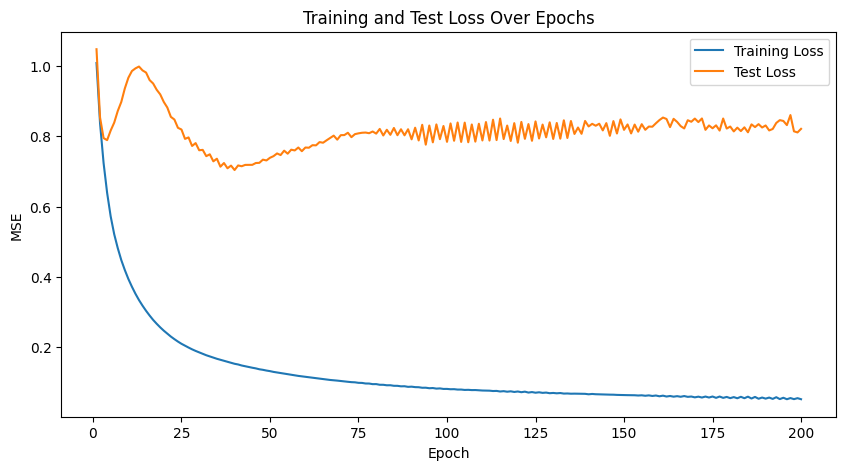

Final Test MSE: 0.8209198297105254


In [64]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')